In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import impute
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.svm import OneClassSVM

import pca
import seaborn as sns
import matplotlib.pyplot as plt

import os


ERROR: Could not find a version that satisfies the requirement conda (from versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16)
ERROR: No matching distribution found for conda
/bin/bash: line 1: conda: command not found


In [2]:
print(os.getcwd())
df = pd.read_csv("DS_salary_factors.csv")

df.info()

/content
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   GeoFips                                                    51 non-null     int64  
 1   GeoName                                                    51 non-null     object 
 2   2022 GDP                                                   51 non-null     float64
 3   Total Civilian Non-Institutional Population in State/Area  51 non-null     int64  
 4   Total Civilian Labor Force in State/Area                   51 non-null     int64  
 5   Percent (%) of State/Area's Population                     51 non-null     float64
 6   Total Employment in State/Area                             51 non-null     int64  
 7   Percent (%) of Labor Force Employed in State/Area          51 non-null     float64
 8   Tot

In [3]:
X = df.loc[:, "2022 GDP":]



In [4]:
missing_columns = X.columns[X.count()<51]

In [5]:
df.loc[X.isna().any(axis=1), ["GeoName"]+missing_columns.to_list()]

,GeoName,Happiness
8,District of Columbia,NaN


In [6]:
scaler = StandardScaler().fit(X)


In [7]:
X.loc[:,:] = scaler.transform(X)

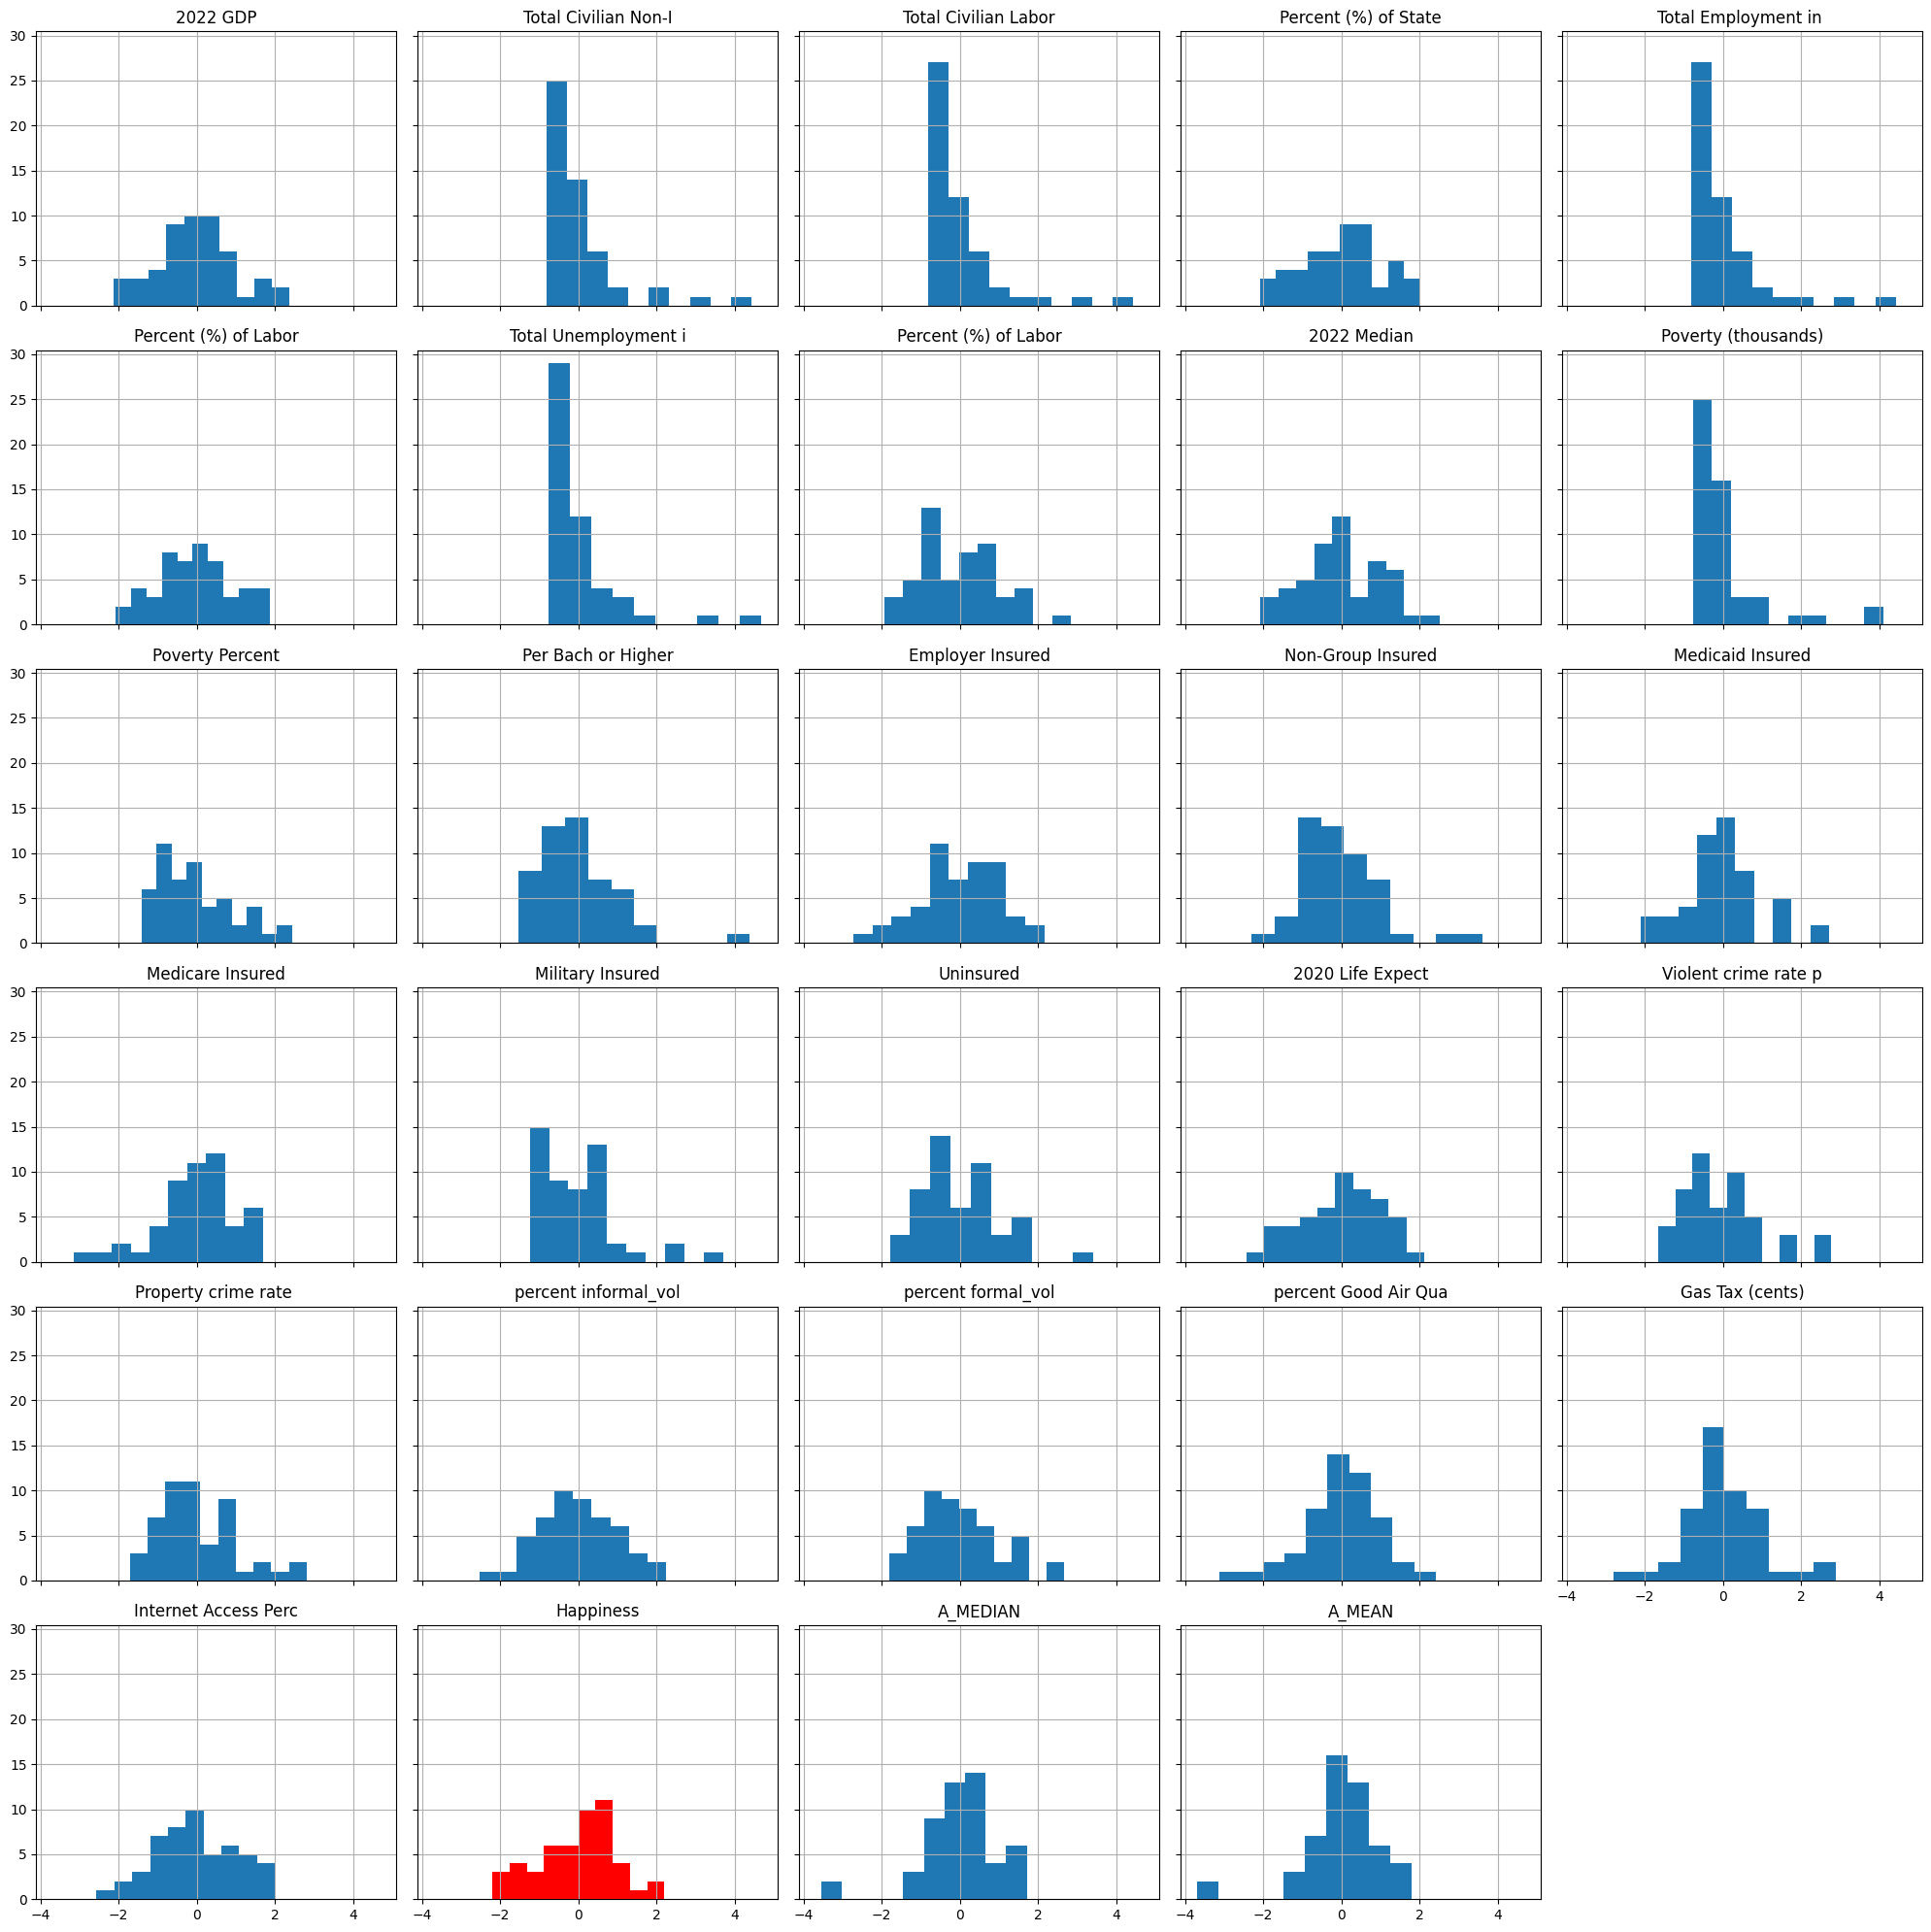

In [8]:

axes = X.hist( sharex=True, sharey=True,figsize=(20, 20) );
for ax in axes.ravel():
  t =ax.get_title()
  if t in missing_columns:
    X[t].hist(ax=ax, color = "red")
  ax.set_title(t[:20])

plt.tight_layout()

<Axes: >

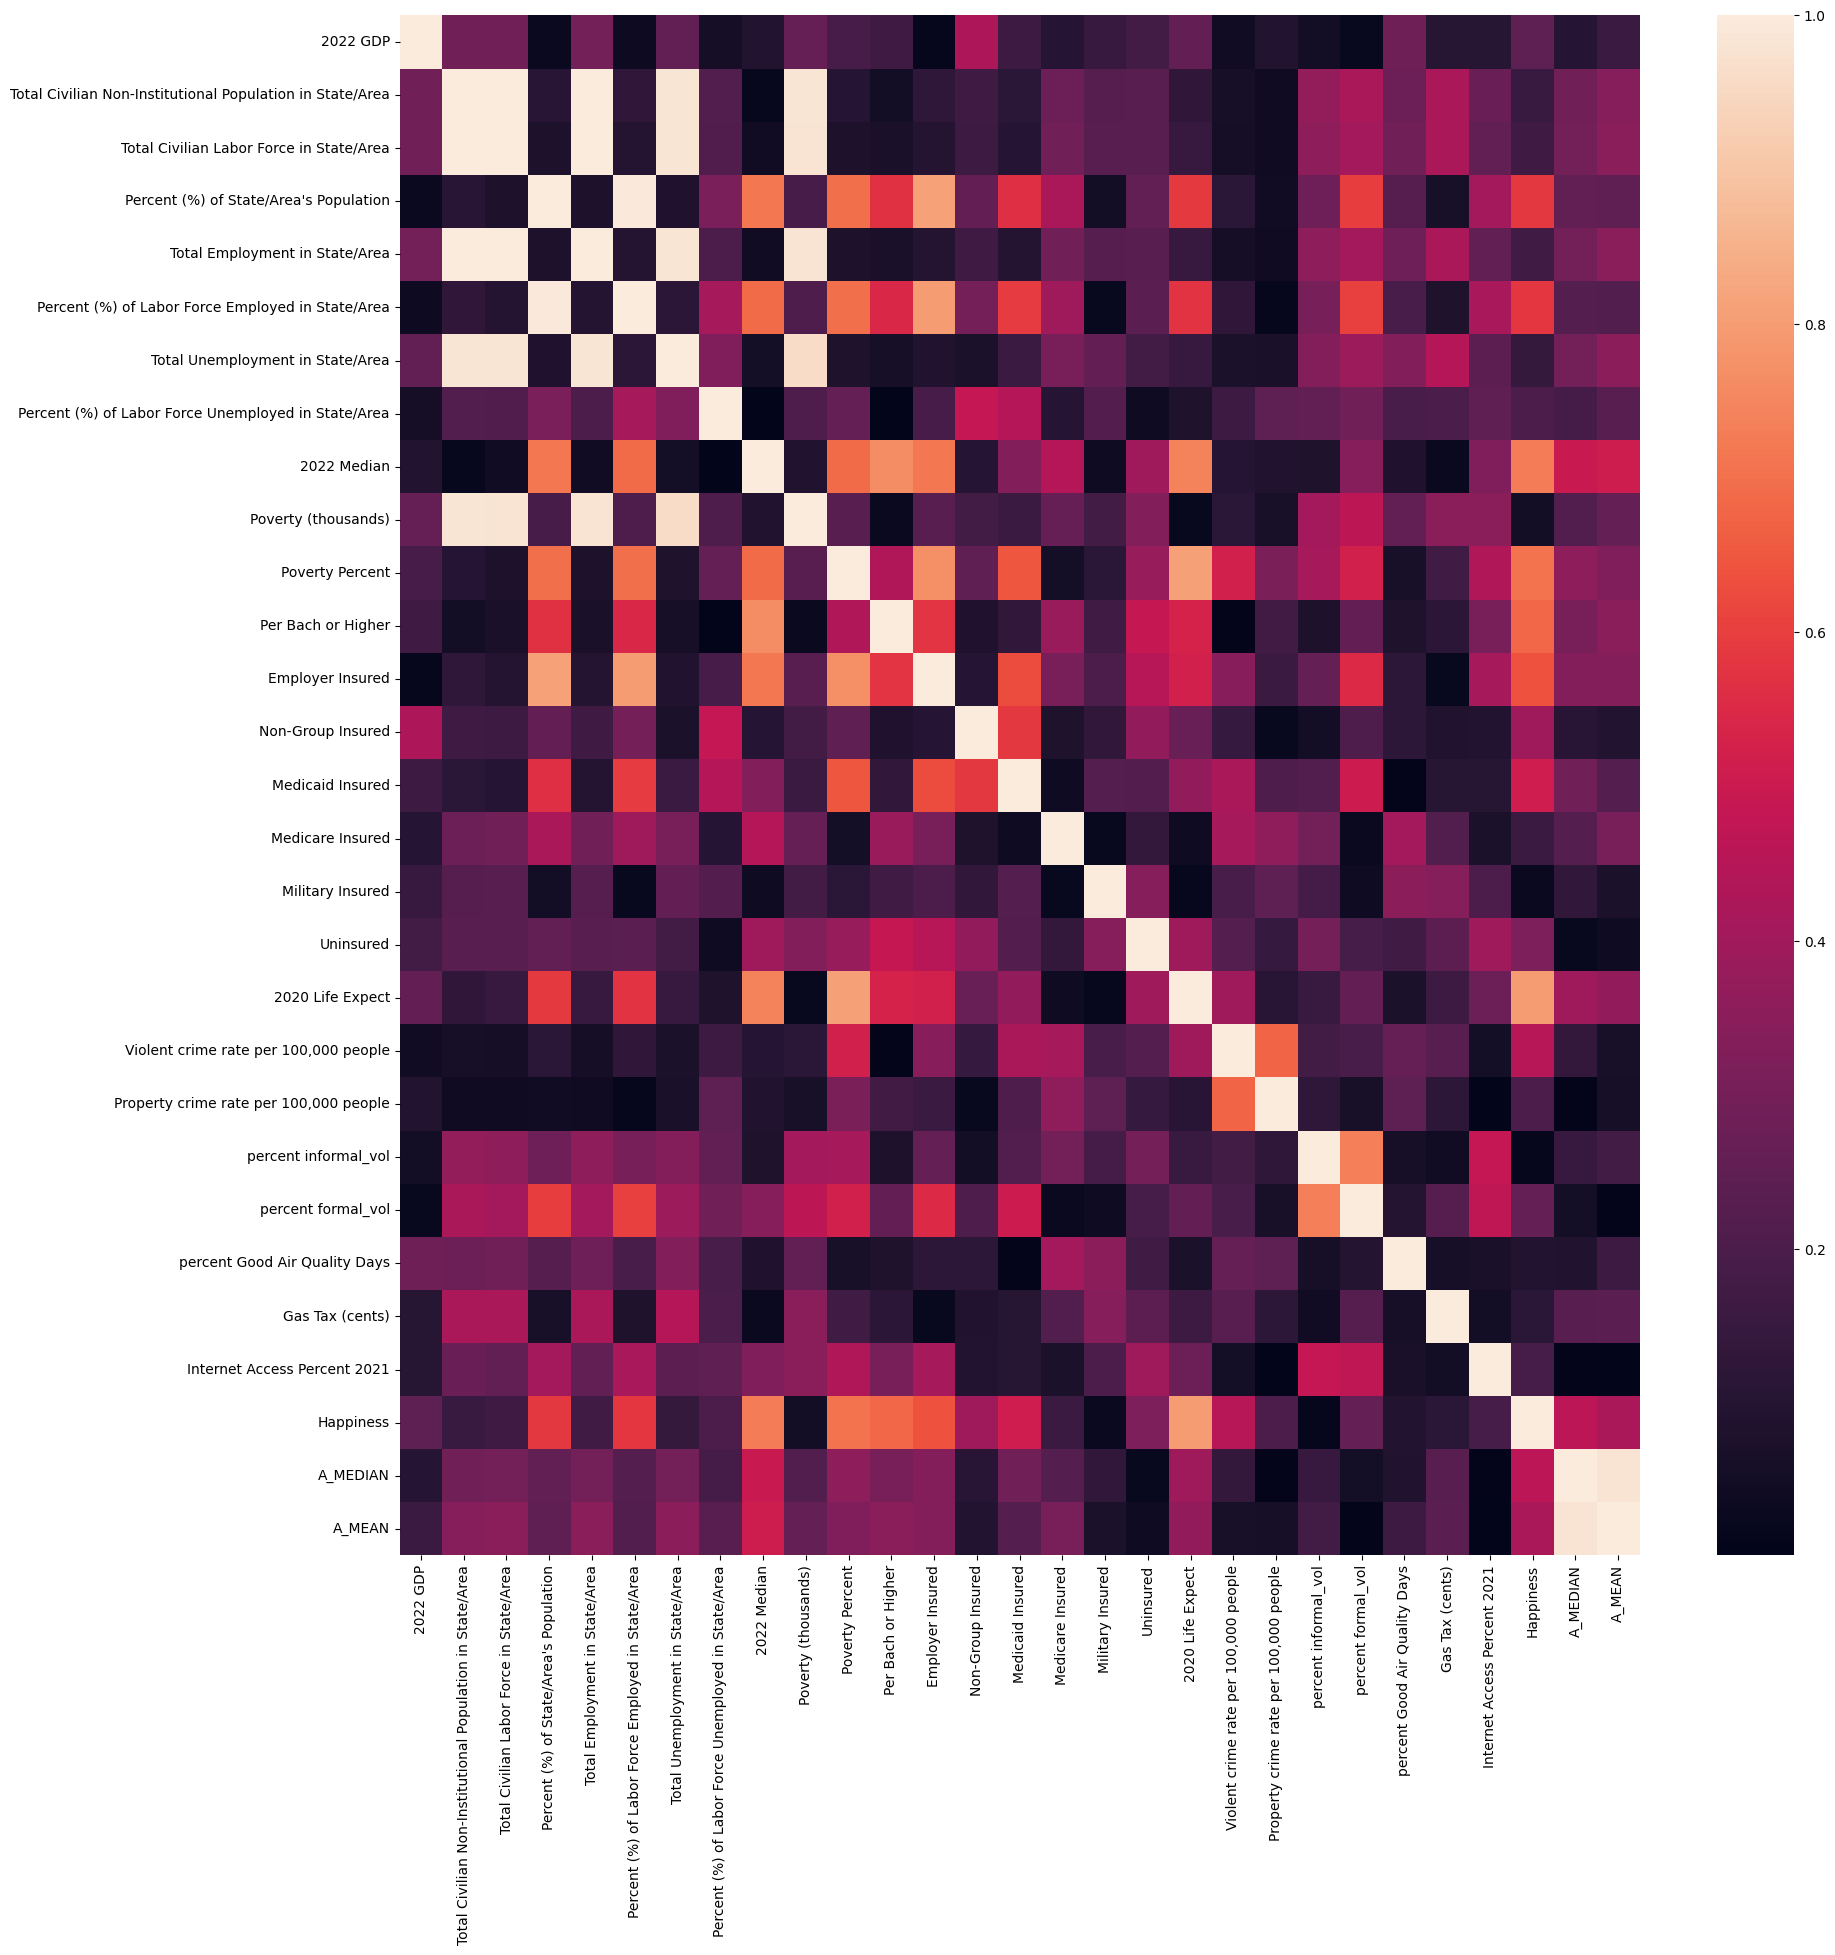

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(abs(X.corr()), ax=ax)

<Axes: >

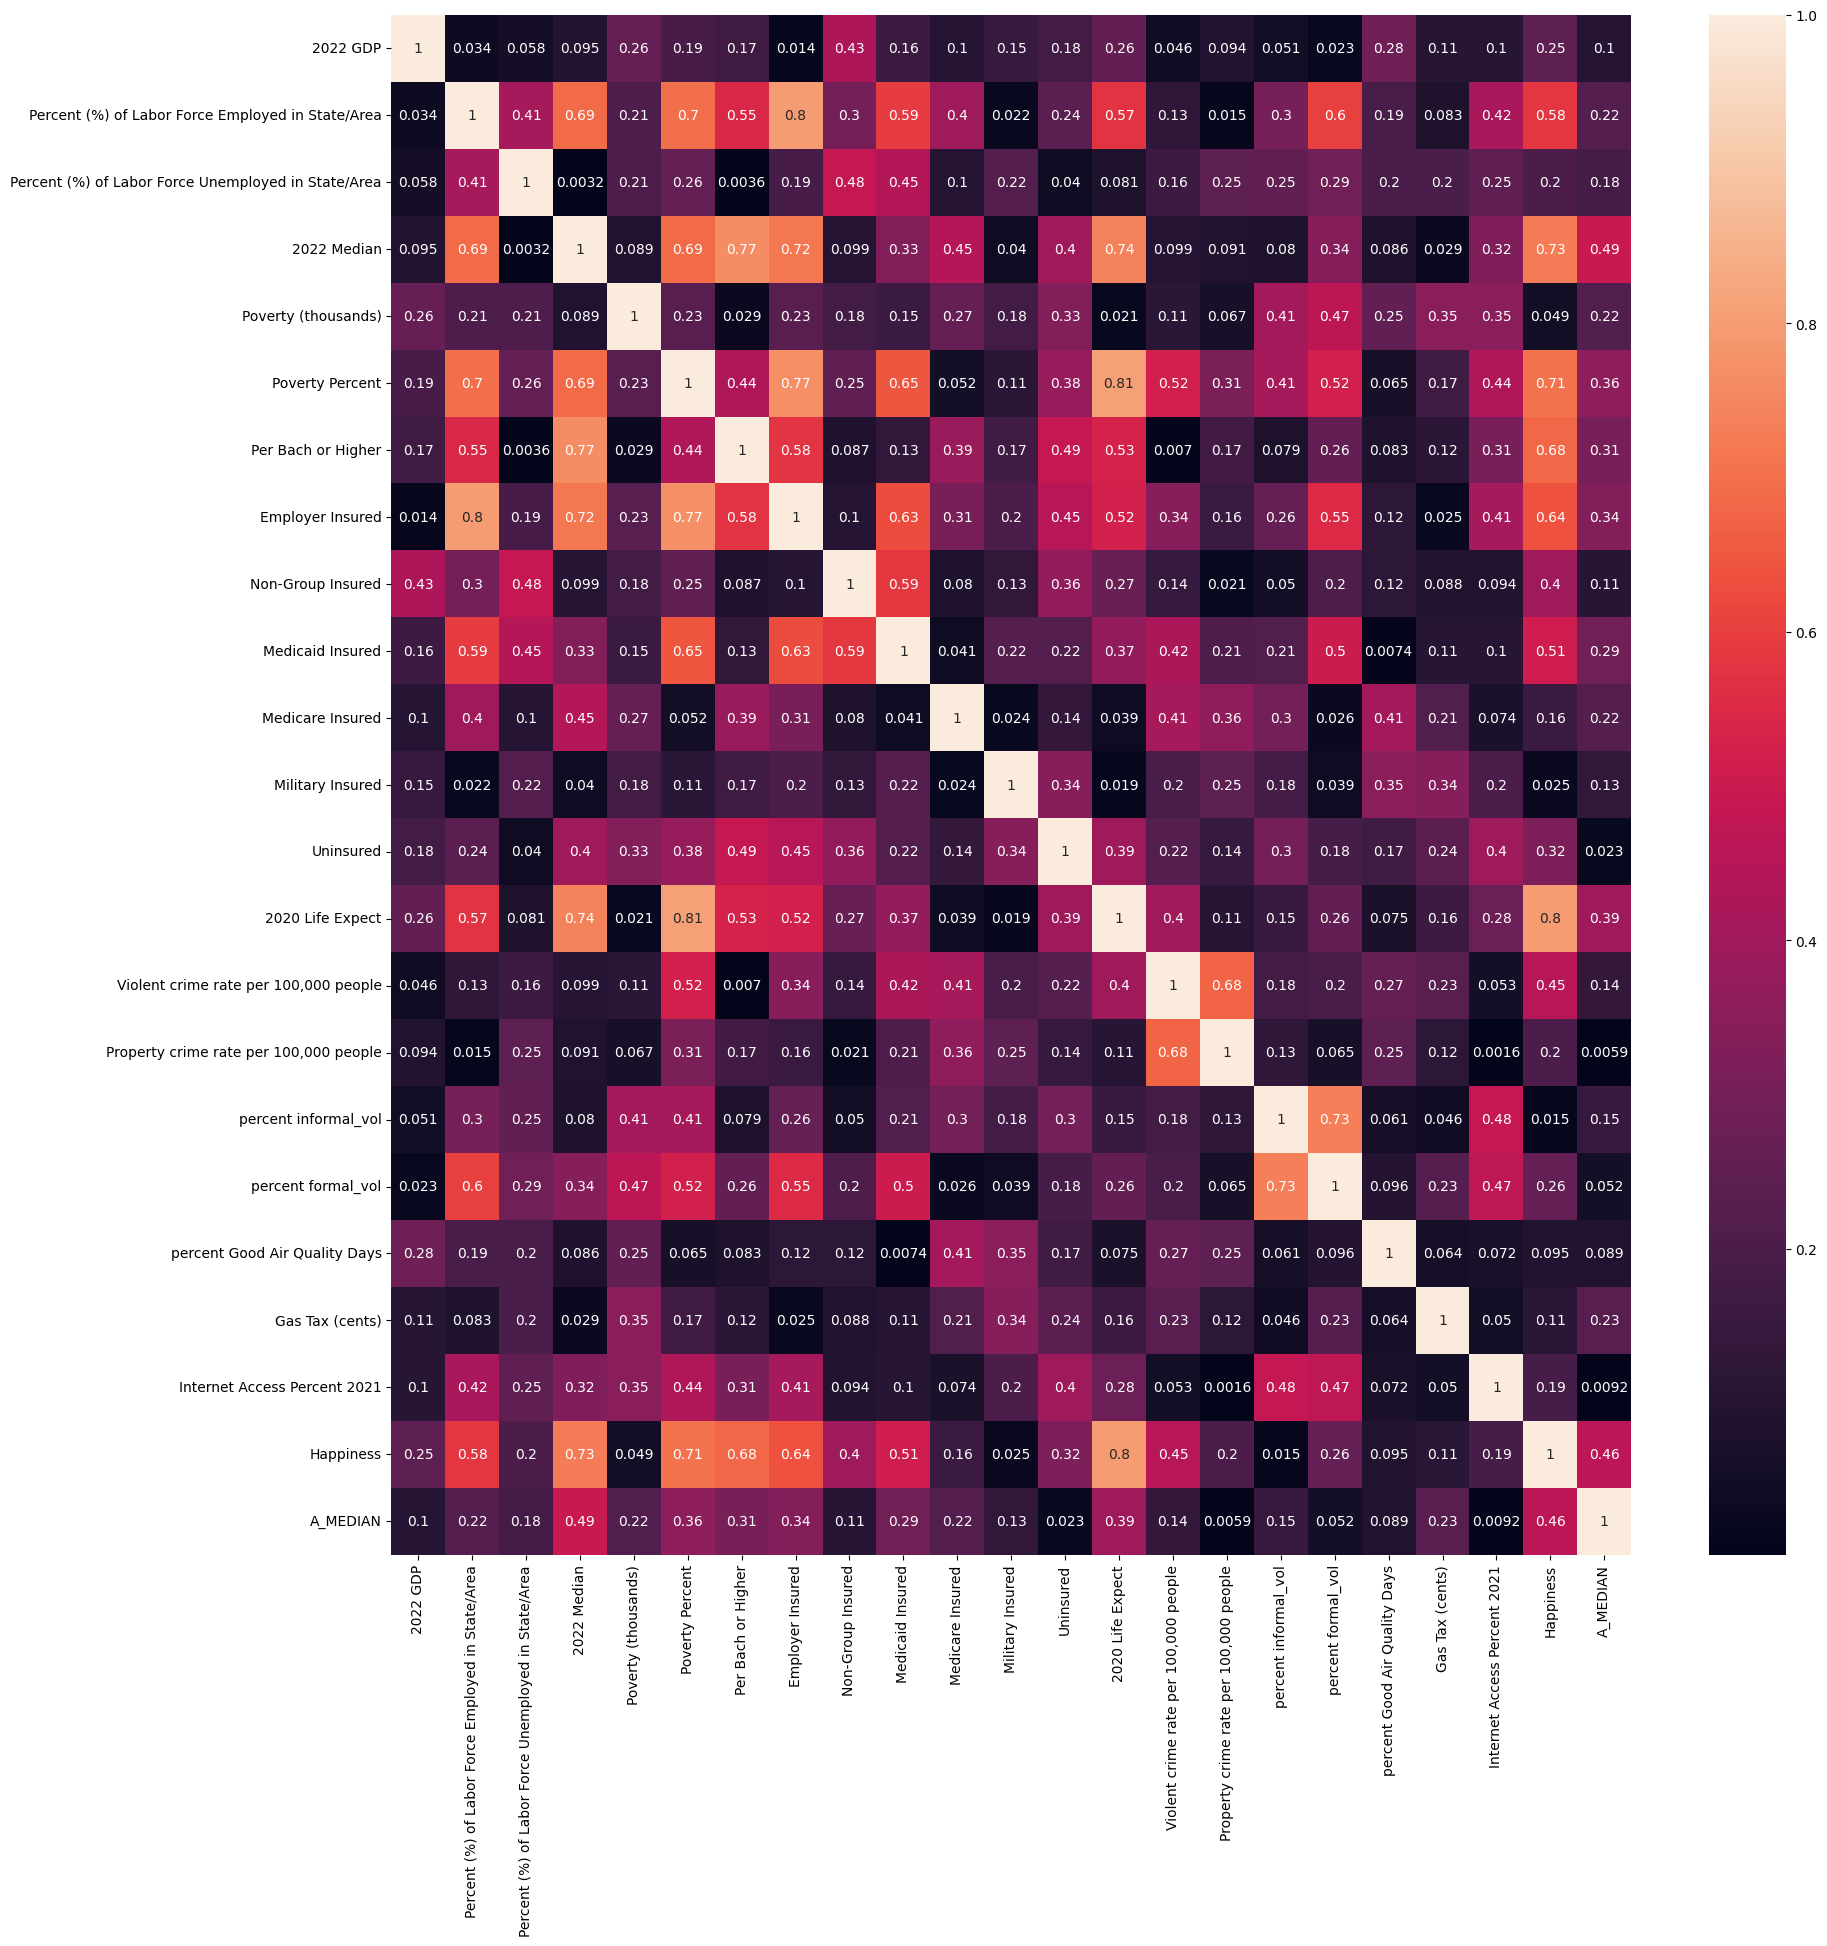

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
subset = X.drop(columns=X.filter(like="Total")).drop(
    columns=["Percent (%) of State/Area's Population",
             "A_MEAN"])
sns.heatmap(abs(subset.corr()), ax=ax, annot=True)

In [28]:
imputer = impute.IterativeImputer(max_iter=100, skip_complete=True)
subset.loc[:, :] = imputer.fit_transform(subset)

In [29]:
one_svm = OneClassSVM(kernel="rbf", gamma="auto", nu = .05)
one_svm.fit(subset)
outliers = pd.Series(one_svm.predict(subset), name="outlier")

In [30]:
np.where(outliers<0)

(array([ 3,  8,  9, 18, 19, 23, 24, 28, 29, 34, 45, 48, 50]),)

In [31]:
outlier_states = df.GeoName.loc[np.where(outliers<0)]
outlier_states

3                 Arkansas
8     District of Columbia
9                  Florida
18               Louisiana
19                   Maine
23               Minnesota
24             Mississippi
28                  Nevada
29           New Hampshire
34            North Dakota
45                 Vermont
48           West Virginia
50                 Wyoming
Name: GeoName, dtype: object

In [32]:
df["outliers"] = outliers

In [35]:
X_pca.shape
df_pca =pd.DataFrame(X_pca)
df_pca["outliers"] = outliers
df_pca

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,outliers
0,-3.361489,-0.781381,1.121969,-0.474534,0.262345,-0.132708,-0.738448,-0.774334,0.586648,-0.706545,...,-0.130165,0.137503,0.108916,0.146265,0.169214,0.530222,-0.038803,-0.232230,-0.001093,1
1,-1.102288,0.117021,0.895011,3.370731,3.049426,-0.755046,0.401843,-0.556576,0.786187,1.950155,...,-0.516351,-0.264496,-0.669799,-0.191014,0.133331,0.059726,0.167915,-0.103179,-0.005255,1
2,-1.264787,1.819147,0.986467,-0.219923,-1.178036,-0.312177,0.532577,2.063364,0.435657,-0.998387,...,0.147692,-0.683314,0.718674,-0.051753,0.045110,0.051693,0.127975,0.159338,0.004757,1
3,-4.958434,-0.932145,-0.110511,1.721872,-1.389587,1.303518,-1.477383,0.294956,-0.255795,-0.729729,...,-0.050119,-0.127317,-0.644193,0.065375,-0.397172,0.226256,0.036245,-0.019190,-0.008665,-1
4,-0.115331,5.442333,-1.176156,-2.432538,-2.091399,0.379936,0.216374,-1.535248,-0.082802,0.109321,...,0.572645,0.151059,-0.264429,-0.079257,0.455007,0.730254,-0.100074,0.023577,-0.005894,1
5,2.609337,1.730845,0.652499,2.111222,-0.634029,1.693019,0.196722,-0.129020,0.286809,-0.477256,...,-0.198013,0.107086,0.901059,0.078531,0.967770,-0.100286,-0.117942,0.058942,0.005707,1
6,1.795222,0.289709,-1.495800,-0.795306,1.220165,-1.624363,-0.712354,0.976032,-1.201505,0.415902,...,0.087194,0.292365,0.692541,0.215925,-0.446486,0.048250,-0.198610,-0.023673,0.003158,1
7,0.806801,-0.642321,-1.290692,-0.067541,0.049046,-0.096126,2.120013,1.366503,-0.588859,0.292967,...,-0.712949,-0.670223,-0.353577,0.475572,0.120895,-0.347540,0.255782,0.028705,-0.003029,1
8,2.637913,4.545068,-2.457844,5.336303,-0.177756,0.095117,-0.658572,-0.315591,-1.108092,-0.450083,...,0.695038,-0.519532,-0.154457,-0.604571,0.061605,0.007753,0.215584,-0.139144,-0.003536,-1
9,-1.500387,1.059155,3.603634,-4.390767,-0.367193,1.977523,-1.081840,-0.653910,-1.244951,0.311102,...,-0.599735,-0.104438,0.040163,-0.336476,-0.139257,-0.070308,0.520967,0.147141,-0.000617,-1


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 14 Principal Components explain [96.47%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

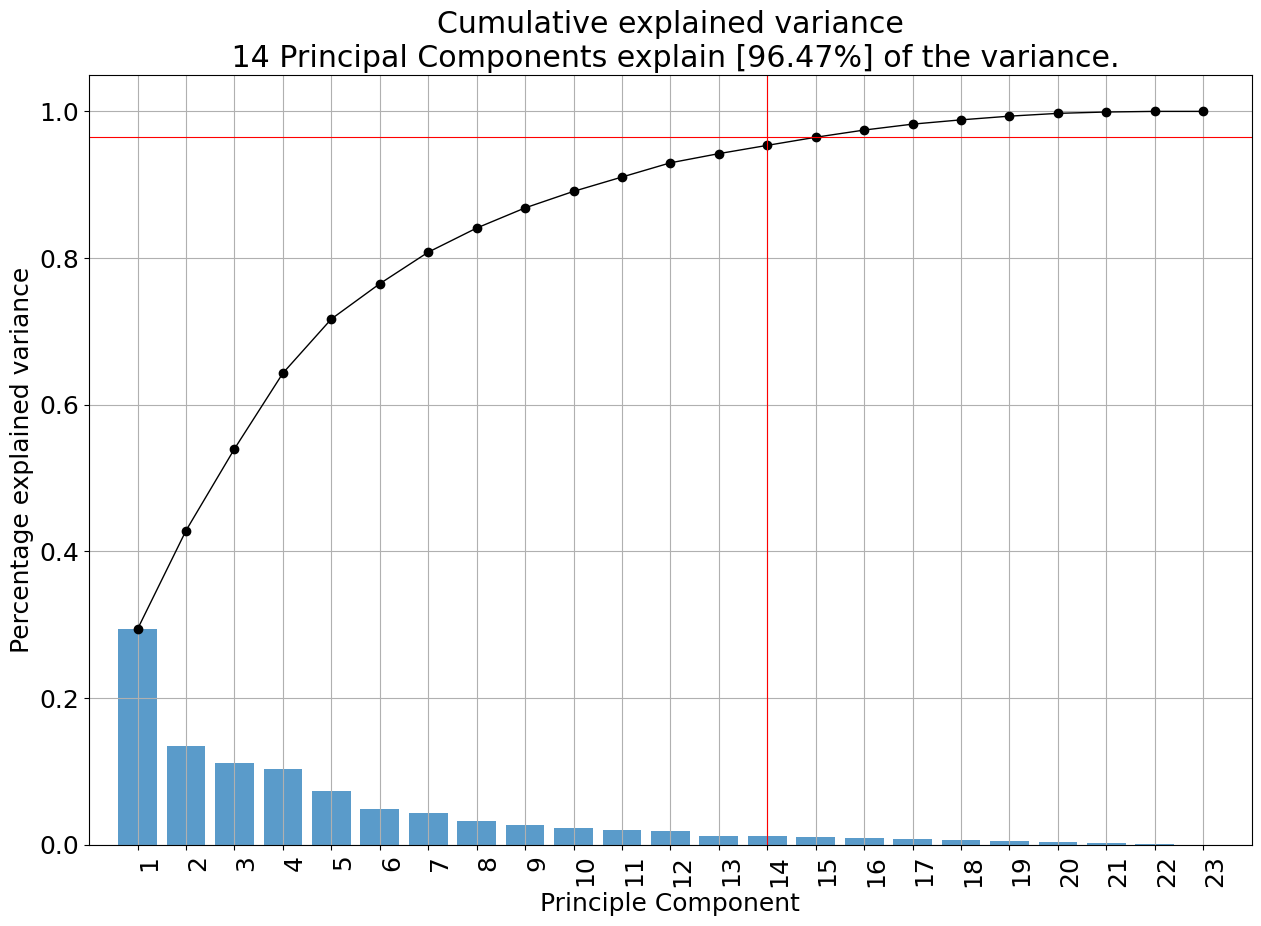

In [89]:
model.plot()

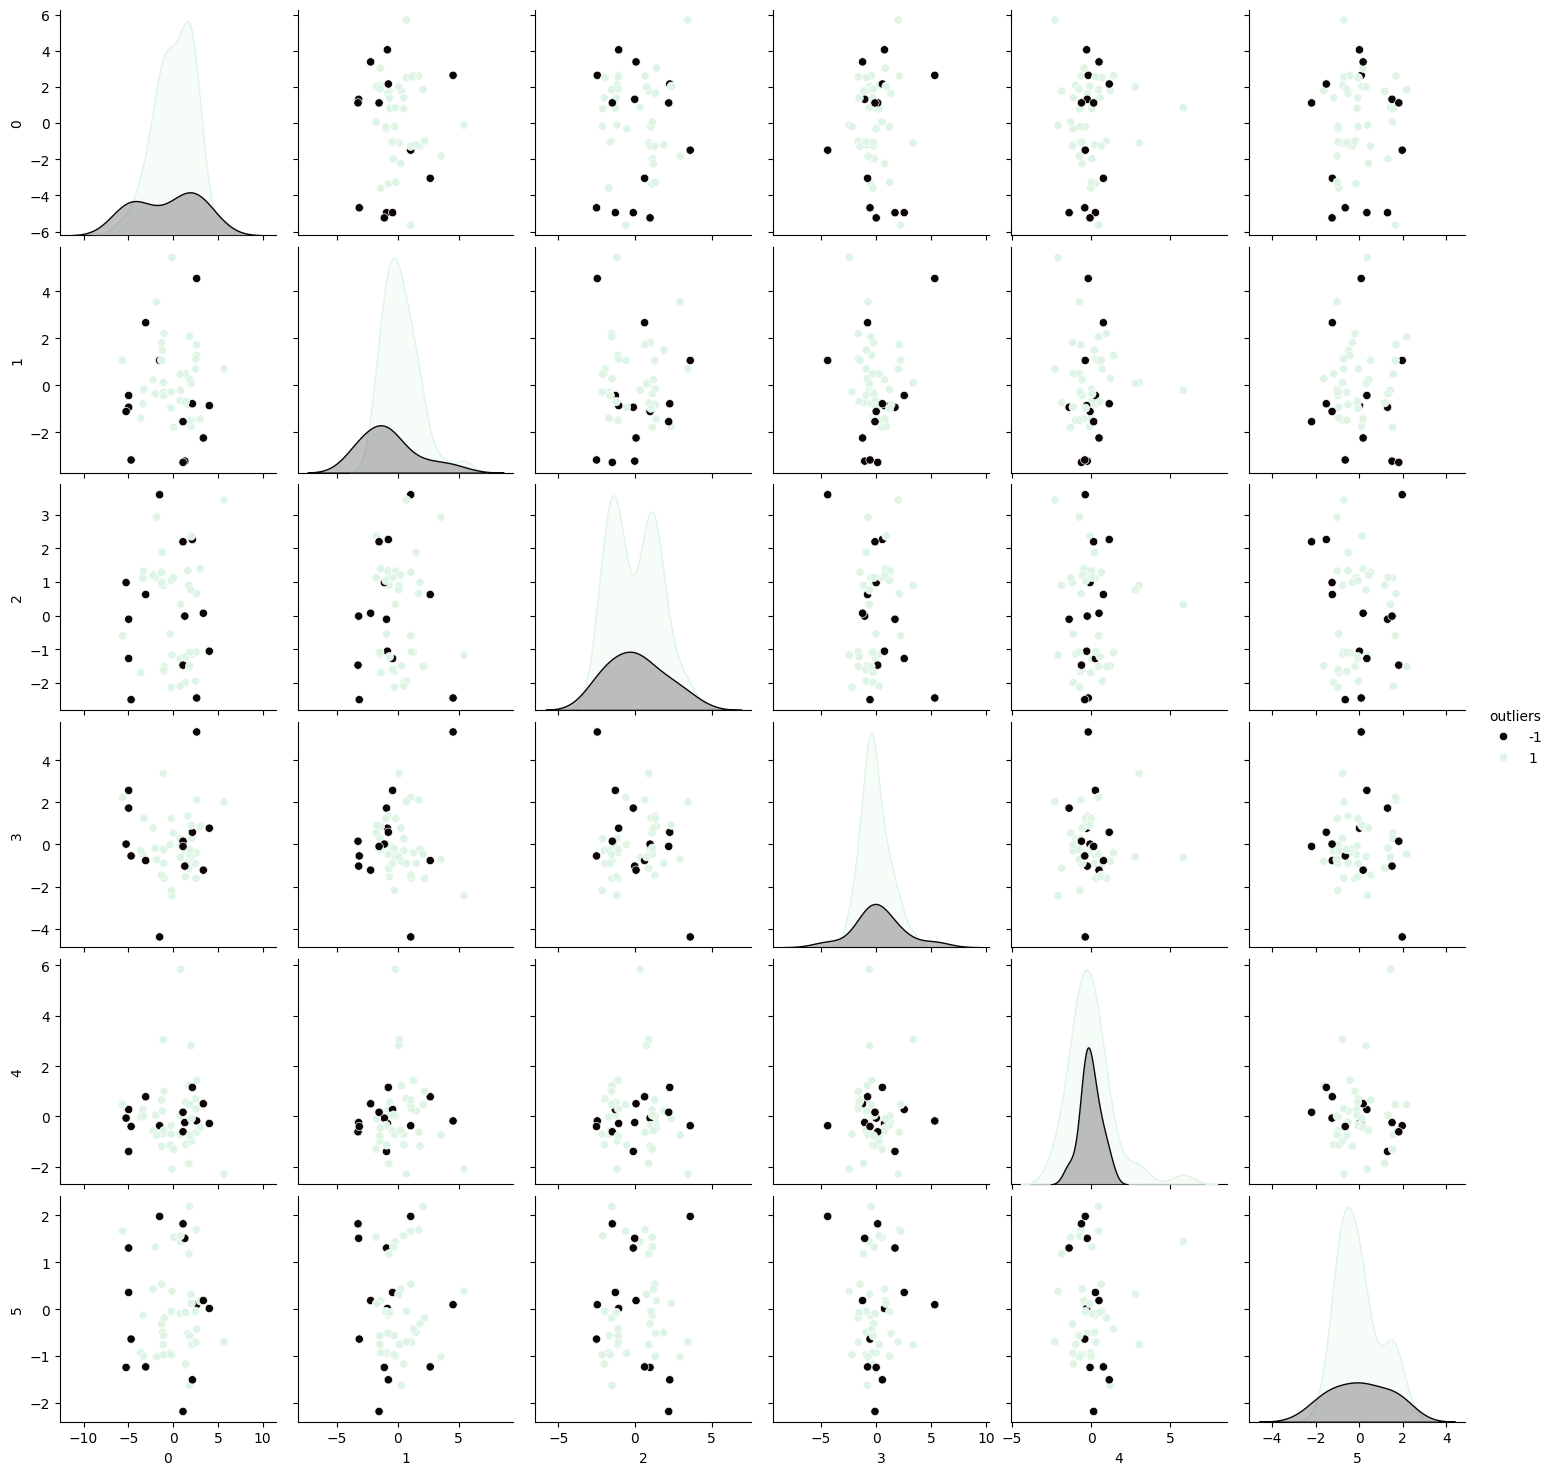

In [39]:
sns.pairplot(df_pca.loc[:,[0,1,2,3,4,5,"outliers"] ], hue="outliers", palette="mako")

<Axes: >

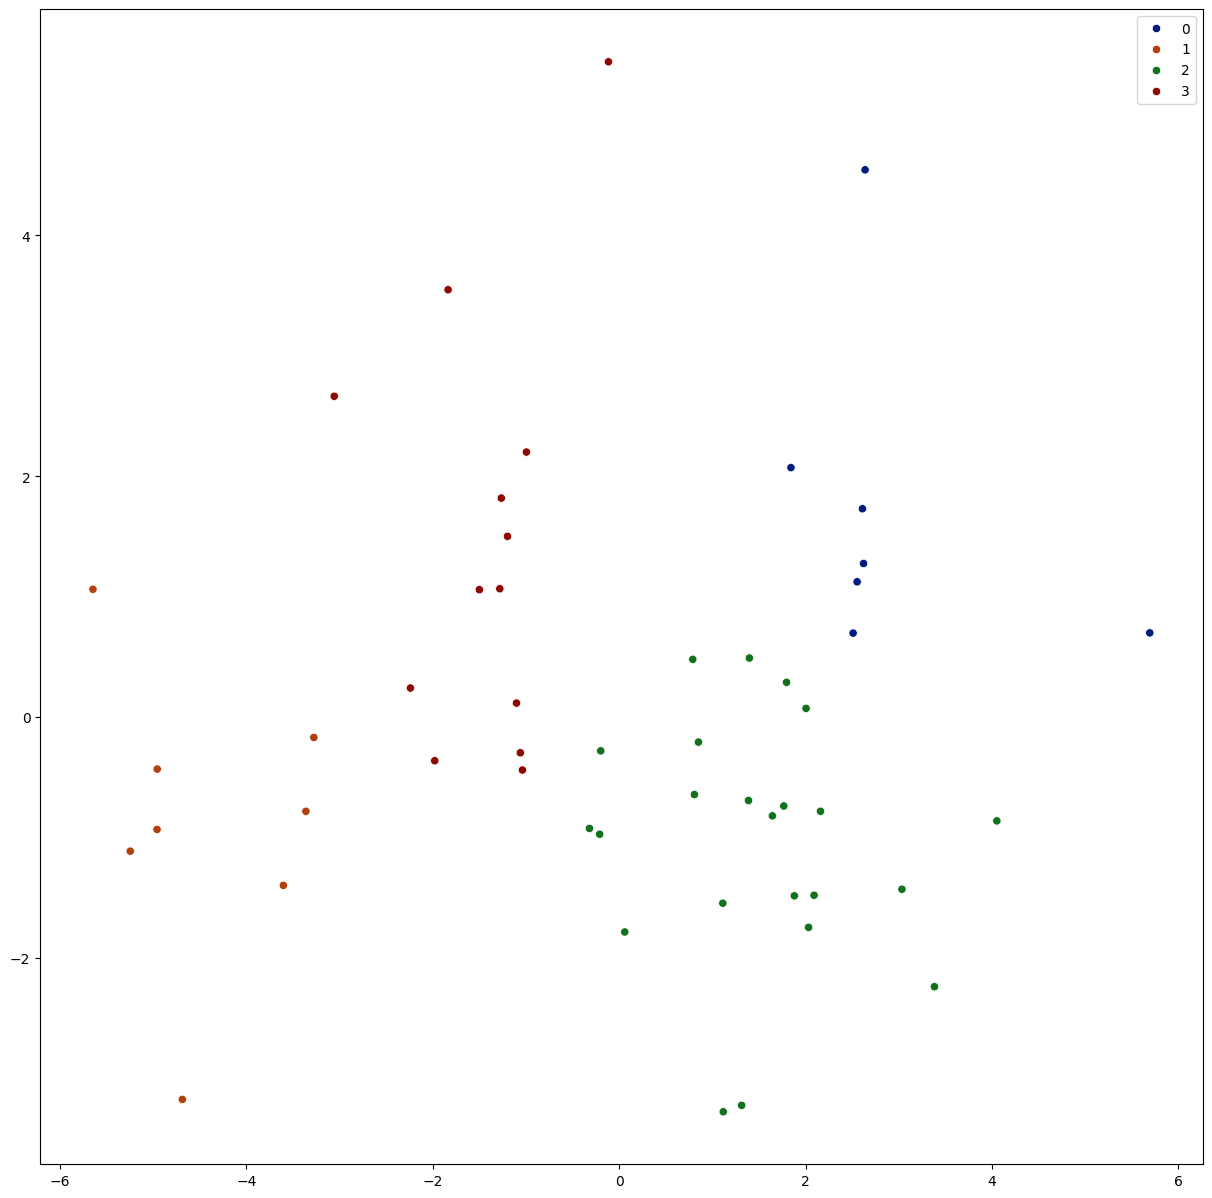

In [57]:
kmeans = KMeans(n_clusters=4, n_init=100)
plt.subplots(figsize=(15, 15))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.fit(X_pca[:, :2]).labels_, palette="dark")

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

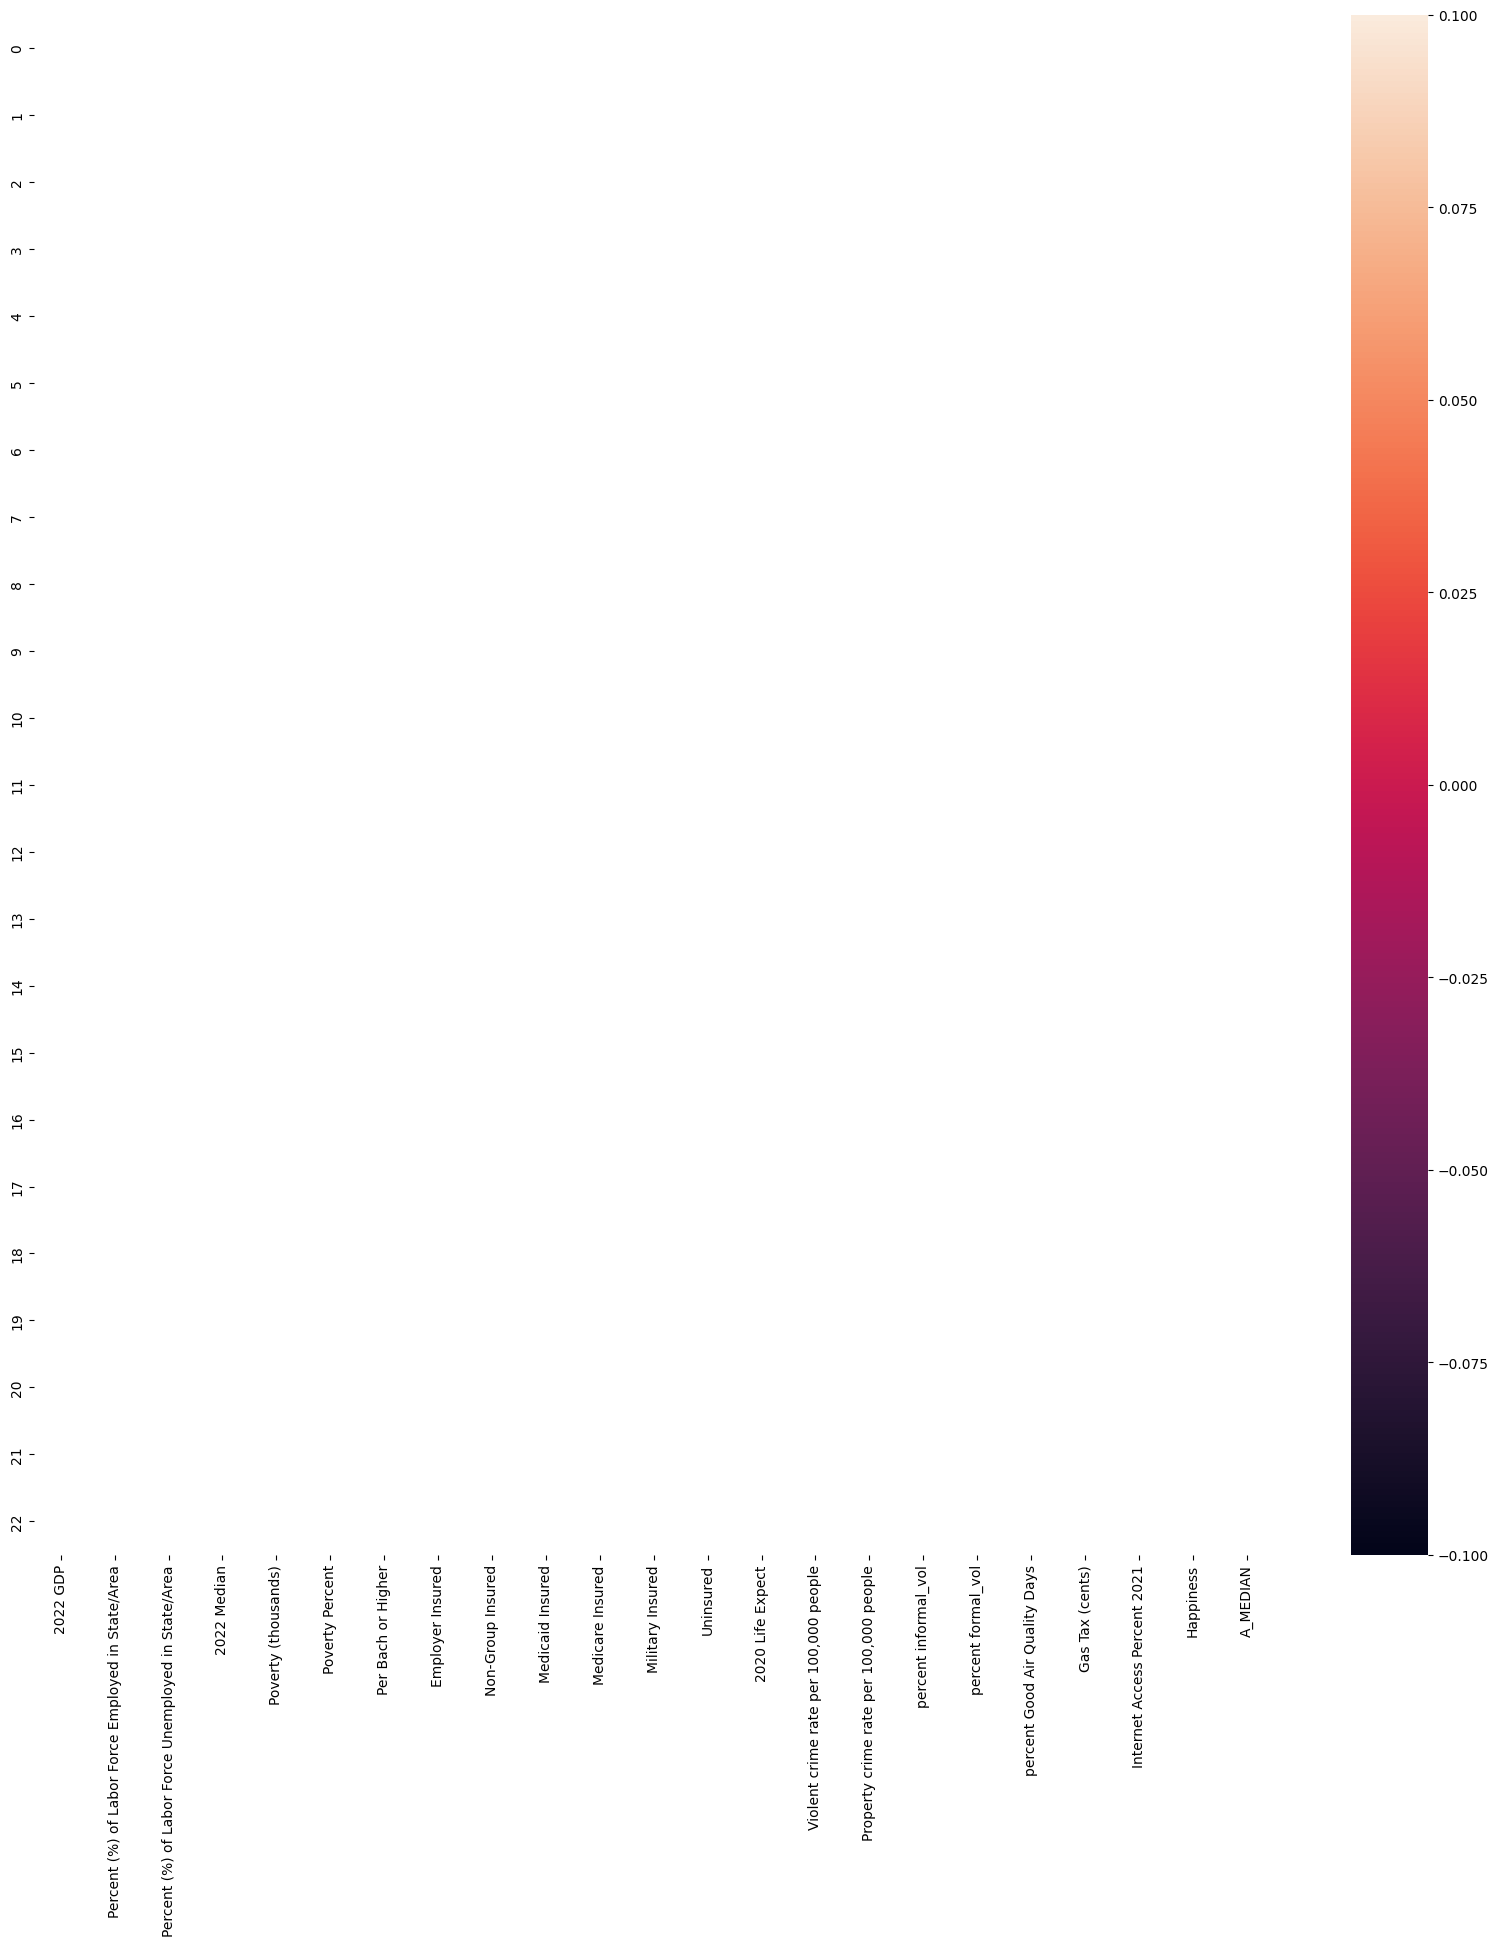

In [71]:
# prompt: visualize pca component feature importance

import pandas as pd
import matplotlib.pyplot as plt
pca_components_df = pd.DataFrame(pca.components_, columns=subset.columns)
abs_pca_components = abs(pca_components_df)
pca_components_df.loc[:, :] = abs_pca_components / abs_pca_components.sum(axis=1)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pca_components_df, ax=ax, annot=True)
